# SKLearn's ML

Using the csv files we generated from the "02 VoiceSentiment-Feature_Extraction", we will build models using the “traditional” machine learning  to be used as baseline when we build our deep learning model. 

1. Load our train and test dataset
2. Base Model
3. Define X and Y
4. Need to scale the data before we build our models
5. Building Models
    - 5.1 MLP
    - 5.2 RandomForest
    - 5.3 Logistic Regression
    - 5.4 VotingClassifier
6. Metrics
7. Summary

In [42]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score

from datetime import datetime

import optuna
import joblib

#for Audio processing
from IPython.display import Audio
import librosa
import librosa.display

### 1. Load our train and test dataset

In [43]:
#load the data
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

#remove the index column
df_train = df_train.drop(columns='Unnamed: 0')
df_test = df_test.drop(columns='Unnamed: 0')

In [44]:
df_train.shape

(10188, 186)

In [45]:
df_test.shape

(1132, 186)

## 2. Base Model

In [46]:
df_test["label"].value_counts(normalize=True)

disgust      0.143993
fear         0.143993
happy        0.143993
sad          0.143993
angry        0.143993
surprised    0.143993
neutral      0.136042
Name: label, dtype: float64

In [47]:
df_train["label"].value_counts(normalize=True)

fear         0.143993
happy        0.143993
surprised    0.143993
sad          0.143993
angry        0.143993
disgust      0.143993
neutral      0.136042
Name: label, dtype: float64

## Base Model is around 14%

### 3. Define X and Y

In [48]:
#converting categorical labels to numeric for test dataset
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])
df_test['label']= le.transform(df_test['label'])

In [49]:
#converting categorical labels to numeric for train dataset
#factor_test = pd.factorize(df_test['label'], sort=True)
#df_test['label'] = factor_test[0]   
#factor_train= pd.factorize(df_train['label'], sort=True)
#df_train['label'] = factor_train[0]   

In [50]:
#since we already split our data to train and test in the prior notebook, we will just assign the values accordingly
X_train = df_train.drop(columns=["label", "file"])
y_train = df_train["label"]

X_test = df_test.drop(columns=["label", "file"])
y_test = df_test["label"]

### 4. Need to scale the data before we build our models

In [51]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
def score_model(name, model):
    
    models[name] = {}
    
    models[name]["train_score"] = model.score(X_train_scaled, y_train)
    models[name]["test_score"] = model.score(X_test_scaled, y_test)
    models[name]["model"] = model

    y_pred = model.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (10, 5))
    cm = pd.DataFrame(cm , index = [i for i in le.classes_] , columns = [i for i in le.classes_])
    sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

    plt.title(f'{name} Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()
    
    # predicting on test data.
    y_predx = le.inverse_transform(y_pred)
    y_testx = le.inverse_transform(y_test)

    print(classification_report(y_testx, y_predx))

    pass

### 5. Building Models

***BEST PARAMETERS obtained by using OPTUNA***

In [57]:
models = {}

In [60]:
## 5.1 Multi-layer Perceptron classifier.

##Optuna
#Trial 8 finished with value: 0.8530609147840515 and 
#    parameters: {'activation': 'logistic', 'solver': 'lbfgs', 'hidden_layer_sizes': 880, 
#                 'alpha': 0.3768510253499107, 'batch_size': 300, 'learning_rate': 'invscaling'}. 
#        Best is trial 8 with value: 0.8530609147840515.
            
mlp = MLPClassifier(activation= 'logistic', #'relu', 
              solver= 'lbfgs', #'sgd', 
              hidden_layer_sizes= 880, #1200,
              alpha= 0.376851, #0.255, 
              batch_size= 300, #200, 
              learning_rate= 'invscaling', #'constant',
              max_iter=10000
             ,random_state= 0)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"MLP Model Fit.. Current Time = {current_time}")
    
mlp.fit(X_train_scaled, y_train)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"MLP Model Completion.. Current Time = {current_time}")



MLP Model Fit.. Current Time = 18:51:07
MLP Model Completion.. Current Time = 18:55:05


In [62]:
## 5.2 Random Forest

rf = RandomForestClassifier(n_estimators= 650
                            , max_depth= 85
                            , criterion= 'entropy'
                            ,random_state= 0)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"RF Model Fit.. Current Time = {current_time}")

rf.fit(X_train_scaled, y_train)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"RF Model Completion.. Current Time = {current_time}")

RF Model Fit.. Current Time = 18:55:43
RF Model Completion.. Current Time = 18:57:30


In [63]:
## 5.3 Logistic Regression

lr = LogisticRegression(multi_class = 'multinomial'
                        , penalty = 'l2'
                        ,solver = 'saga'
                        , max_iter= 10000
                        ,random_state= 0)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"LR Model Fit.. Current Time = {current_time}")

lr.fit(X_train_scaled, y_train)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"LR Model Completion.. Current Time = {current_time}")

LR Model Fit.. Current Time = 18:57:30
LR Model Completion.. Current Time = 19:00:15


In [65]:
## 5.4 Voting Classifier


vote = VotingClassifier([
    ('mlp', MLPClassifier(activation= 'logistic', 
              solver= 'lbfgs',  
              hidden_layer_sizes= 880, 
              alpha= 0.376851,  
              batch_size= 300,
              learning_rate= 'invscaling', 
              max_iter=10000
             ,random_state= 0)),
    ('rf', RandomForestClassifier(max_depth = 85
                                  ,n_estimators = 650
                                  ,random_state= 0))
    ], voting="soft")

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"VC Model Fit.. Current Time = {current_time}")

vote.fit(X_train_scaled, y_train)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"VC Model Completion.. Current Time = {current_time}")

VC Model Fit.. Current Time = 19:00:28
VC Model Completion.. Current Time = 19:05:35


### 6. Metrics

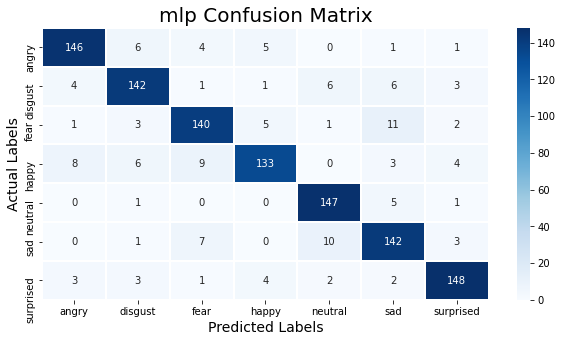

              precision    recall  f1-score   support

       angry       0.90      0.90      0.90       163
     disgust       0.88      0.87      0.87       163
        fear       0.86      0.86      0.86       163
       happy       0.90      0.82      0.86       163
     neutral       0.89      0.95      0.92       154
         sad       0.84      0.87      0.85       163
   surprised       0.91      0.91      0.91       163

    accuracy                           0.88      1132
   macro avg       0.88      0.88      0.88      1132
weighted avg       0.88      0.88      0.88      1132



In [69]:
score_model('mlp', mlp)

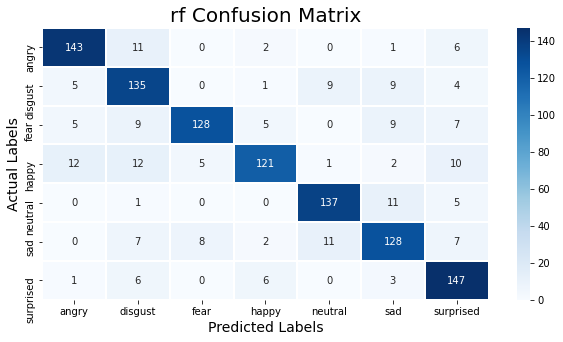

              precision    recall  f1-score   support

       angry       0.86      0.88      0.87       163
     disgust       0.75      0.83      0.78       163
        fear       0.91      0.79      0.84       163
       happy       0.88      0.74      0.81       163
     neutral       0.87      0.89      0.88       154
         sad       0.79      0.79      0.79       163
   surprised       0.79      0.90      0.84       163

    accuracy                           0.83      1132
   macro avg       0.83      0.83      0.83      1132
weighted avg       0.83      0.83      0.83      1132



In [70]:
score_model('rf', rf)


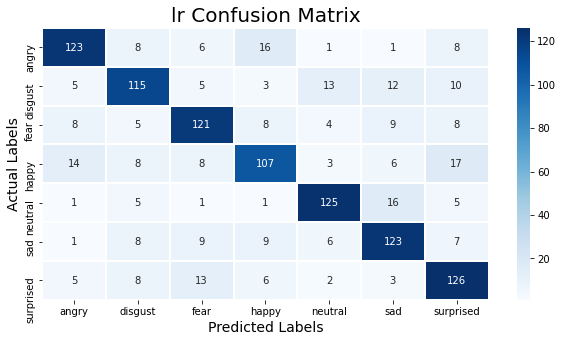

              precision    recall  f1-score   support

       angry       0.78      0.75      0.77       163
     disgust       0.73      0.71      0.72       163
        fear       0.74      0.74      0.74       163
       happy       0.71      0.66      0.68       163
     neutral       0.81      0.81      0.81       154
         sad       0.72      0.75      0.74       163
   surprised       0.70      0.77      0.73       163

    accuracy                           0.74      1132
   macro avg       0.74      0.74      0.74      1132
weighted avg       0.74      0.74      0.74      1132



In [71]:
score_model('lr', lr)


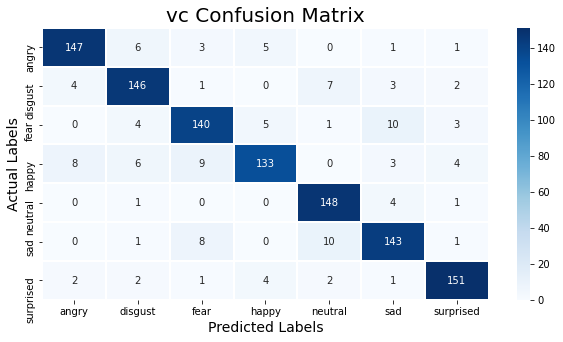

              precision    recall  f1-score   support

       angry       0.91      0.90      0.91       163
     disgust       0.88      0.90      0.89       163
        fear       0.86      0.86      0.86       163
       happy       0.90      0.82      0.86       163
     neutral       0.88      0.96      0.92       154
         sad       0.87      0.88      0.87       163
   surprised       0.93      0.93      0.93       163

    accuracy                           0.89      1132
   macro avg       0.89      0.89      0.89      1132
weighted avg       0.89      0.89      0.89      1132



In [72]:
score_model('vc', vote)

In [86]:
models

{'mlp': {'train_score': 0.9995092265410287,
  'test_score': 0.8816254416961131,
  'model': MLPClassifier(activation='logistic', alpha=0.376851, batch_size=300,
                hidden_layer_sizes=880, learning_rate='invscaling',
                max_iter=10000, random_state=0, solver='lbfgs')},
 'rf': {'train_score': 1.0,
  'test_score': 0.8295053003533569,
  'model': RandomForestClassifier(criterion='entropy', max_depth=85, n_estimators=650,
                         random_state=0)},
 'lr': {'train_score': 0.7921083627797408,
  'test_score': 0.7420494699646644,
  'model': LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=0,
                     solver='saga')},
 'vc': {'train_score': 1.0,
  'test_score': 0.8904593639575972,
  'model': VotingClassifier(estimators=[('mlp',
                                MLPClassifier(activation='logistic',
                                              alpha=0.376851, batch_size=300,
                                              h

In [87]:
score_list = []

for model in models:
        dic = {"model": model,
                "test_score": models[model]["test_score"]
        }
        score_list.append(dic)
df_score = pd.DataFrame(score_list)
df_score

,model,test_score
0,mlp,0.881625
1,rf,0.829505
2,lr,0.742049
3,vc,0.890459


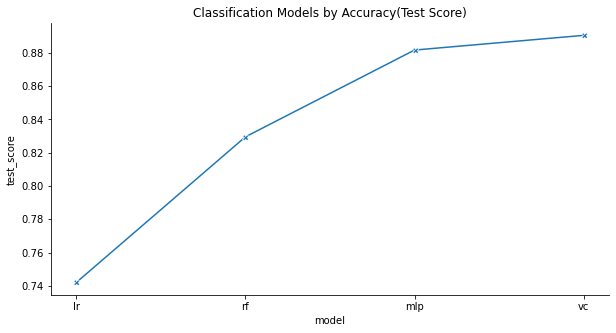

In [88]:
df_score = df_score.sort_values(by="test_score")

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.lineplot(data=df_score, x='model', y='test_score', ax=ax, marker='X');

plt.title("Classification Models by Accuracy(Test Score)", fontsize=12)

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

plt.savefig('./image/accuracy.png')

### Save the best model for future prediction -- Voting Classifier !

In [76]:
#save the model
joblib.dump(vote, './model/vote_model.bin', compress=True)

#save the labelencoder
joblib.dump(le, './model/vote_le.bin', compress=True)

#save the scaler
joblib.dump(scaler, './model/vote_scaler.bin', compress=True)

['./model/vote_scaler.bin']

### Checking missclassified emotions

In [77]:
loaded_model = joblib.load("./model/vote_model.bin")
le = joblib.load('./model/vote_le.bin')

In [78]:
y_pred = loaded_model.predict(X_test_scaled)

In [79]:
df_test["predict"] = y_pred

In [80]:
df_miss = df_test[df_test["label"] != df_test["predict"]][["file","label", "predict"]]
df_miss = df_miss.reset_index()
df_miss.tail()


,index,file,label,predict
119,1102,./raw_source/RAVDESS/Actor_01/03-01-06-01-01-0...,2,3
120,1105,./raw_source/Savee/KL/n21.wav,4,5
121,1121,./raw_source/RAVDESS/Actor_15/03-01-05-02-02-0...,0,3
122,1123,./raw_source/RAVDESS/Actor_22/03-01-06-01-02-0...,2,5
123,1127,./raw_source/Savee/JE/f09.wav,2,6


In [81]:
def play_librosa(wav_file, source='None'):
    
    print("WAV: ", wav_file)
    
    audio, sfreq = librosa.load(wav_file)
    time = np.arange(0, len(audio)) / sfreq

    print('Sample Rate:', sfreq)
    
    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time (sec)',  ylabel='Sound Amplitude')

    return Audio(data=audio, rate=sfreq)

Actual is ['fear'] Predicted as ['surprised']
WAV:  ./raw_source/Savee/JE/f09.wav
Sample Rate: 22050


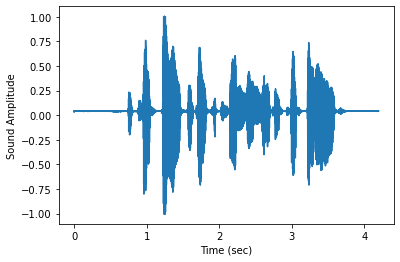

In [82]:
print(f'Actual is {le.inverse_transform([df_miss.iloc[123]["label"]])} Predicted as {le.inverse_transform([df_miss.iloc[123]["predict"]])}')
play_librosa(df_miss.iloc[123]["file"])

Actual is ['happy'] Predicted as ['disgust']
WAV:  ./raw_source/RAVDESS/Actor_23/03-01-03-01-02-02-23.wav
Sample Rate: 22050


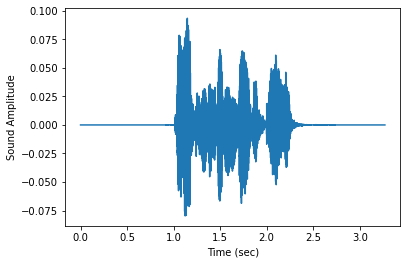

In [83]:
print(f'Actual is {le.inverse_transform([df_miss.iloc[10]["label"]])} Predicted as {le.inverse_transform([df_miss.iloc[10]["predict"]])}')
play_librosa(df_miss.iloc[10]["file"])

Actual is ['sad'] Predicted as ['fear']
WAV:  ./raw_source/RAVDESS/Actor_23/03-01-04-02-02-01-23.wav
Sample Rate: 22050


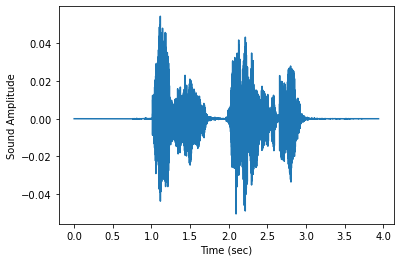

In [84]:
print(f'Actual is {le.inverse_transform([df_miss.iloc[100]["label"]])} Predicted as {le.inverse_transform([df_miss.iloc[100]["predict"]])}')
play_librosa(df_miss.iloc[100]["file"])

## 7. SUMMARY

We have successfully build  models using sklearn's Logistic Regression, Random Forest, MLP CLassifier and VotingClassifier.

MLP Classifier achieved  88% Accuracy. MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification that is completely written in Python.

VotingClassifier using two of our estimators -  RandomForest and MLP did slightly better with 89% accuracy. Voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. It used "soft" voting (if ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers)

## OPTUNA.
#### This ran for a long time and used to search for the best params using Optuna

In [26]:
def objective_mlp(trial):

    params = {
        'activation': trial.suggest_categorical('activation', ['logistic', 'tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam']),
        'hidden_layer_sizes':trial.suggest_int('hidden_layer_sizes', 100, 1500),
        'alpha': trial.suggest_uniform('alpha', 0.001, 0.99),
        'batch_size':trial.suggest_int('batch_size', 150, 300), 
        'learning_rate': trial.suggest_categorical('learning_rate', ['adaptive', 'constant', 'invscaling']),
        'max_iter': 10000
        }
  
    model = MLPClassifier(**params, random_state = 22) 
    
    model.set_params(**params)

    return np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy'))

In [27]:
## MLP

study = optuna.create_study(direction='maximize')
study.optimize(objective_mlp, n_trials=10)

[I 2022-05-19 10:42:52,785] A new study created in memory with name: no-name-e4df7908-ba61-438d-836a-34a11ef88b52
[I 2022-05-19 10:44:18,580] Trial 0 finished with value: 0.8262612233060317 and parameters: {'activation': 'relu', 'solver': 'adam', 'hidden_layer_sizes': 1137, 'alpha': 0.42469533411693366, 'batch_size': 177, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.8262612233060317.
[I 2022-05-19 11:23:46,254] Trial 1 finished with value: 0.8452065155756868 and parameters: {'activation': 'relu', 'solver': 'sgd', 'hidden_layer_sizes': 1468, 'alpha': 0.2683983807642763, 'batch_size': 274, 'learning_rate': 'constant'}. Best is trial 1 with value: 0.8452065155756868.
[I 2022-05-19 11:32:08,182] Trial 2 finished with value: 0.8476615874236343 and parameters: {'activation': 'relu', 'solver': 'lbfgs', 'hidden_layer_sizes': 336, 'alpha': 0.6831884679819882, 'batch_size': 256, 'learning_rate': 'invscaling'}. Best is trial 2 with value: 0.8476615874236343.
[I 2022-05-19 11:35:35,

In [28]:
def objective_rf(trial):

    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
        
    params = {
         'n_estimators': trial.suggest_categorical('n_estimators', [650, 700]),
         'max_depth': trial.suggest_categorical('max_depth', [80, 85]),
         'criterion': trial.suggest_categorical('criterion', ['entropy'])
        }
  
    model = RandomForestClassifier(**params, random_state = 0) 
    
    model.set_params(**params)

    return np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))

In [29]:
## RANDOM FOREST

study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=10)

[I 2022-05-19 13:13:13,464] A new study created in memory with name: no-name-715cf938-afc2-4cd9-8f77-213f0583ffdc
[I 2022-05-19 13:19:53,166] Trial 0 finished with value: 0.8843721861942676 and parameters: {'n_estimators': 650, 'max_depth': 85, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8843721861942676.
[I 2022-05-19 13:26:49,911] Trial 1 finished with value: 0.8843721861942676 and parameters: {'n_estimators': 650, 'max_depth': 85, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8843721861942676.
[I 2022-05-19 13:34:13,191] Trial 2 finished with value: 0.8840779244429477 and parameters: {'n_estimators': 700, 'max_depth': 80, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8843721861942676.
[I 2022-05-19 13:41:07,091] Trial 3 finished with value: 0.8843721861942676 and parameters: {'n_estimators': 650, 'max_depth': 80, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8843721861942676.
[I 2022-05-19 13:47:55,334] Trial 4 finished with value: 0.88437218619

In [30]:
def objective_lr(trial):

    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
        
    params = {
         'multi_class': trial.suggest_categorical('multi_class', ['multinomial']),
         'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
         'solver': trial.suggest_categorical('solver', ['saga']),
         'max_iter': 10000
        }
  
    model = LogisticRegression(**params, random_state = 0) 
    
    model.set_params(**params)

    return np.mean(cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))

In [31]:
## Logistic Regression

study = optuna.create_study(direction='maximize')
study.optimize(objective_lr, n_trials=10)

[I 2022-05-19 14:22:20,565] A new study created in memory with name: no-name-4e2d9d8c-5874-4c4d-aa87-60776b887793
[I 2022-05-19 14:32:44,843] Trial 0 finished with value: 0.763445203865871 and parameters: {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.763445203865871.
[I 2022-05-19 14:43:43,022] Trial 1 finished with value: 0.763445203865871 and parameters: {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.763445203865871.
[I 2022-05-19 15:25:52,813] Trial 2 finished with value: 0.76373951379364 and parameters: {'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}. Best is trial 2 with value: 0.76373951379364.
[I 2022-05-19 15:45:30,510] Trial 3 finished with value: 0.76373951379364 and parameters: {'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}. Best is trial 2 with value: 0.76373951379364.
[I 2022-05-19 15:56:56,627] Trial 4 finished with value: 0.76344520386